<a href="https://colab.research.google.com/github/davemccampbell/wandering-Human-Migration/blob/main/colab/Wandering_Human_Migration_for_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Here is the source for the dataset:
#data link https://www.kaggle.com/eliasdabbas/migration-data-worldbank-1960-2018

#Conducting Data Analysis on the following variables:
#Population
#Net migration: the total number of immigrants less the annual number of emigrants, including both citizens and non-citizens 
#Year
#Latitude 
#Income level  

#Alternative hypothesis 1: From 1960 to 2018, there is statistical significance in net migration among those who qualify as falling into the “High” income level/tier per World Bank classifications, as compared to those those who qualify at lower income levels/tiers.
#Alternative hypothesis 2: There is statistical significance in net migration among nations that lie within tropical latitudinal zones when compared with nations that lie within both the northern as well as southern subtropical latitudinal zones, from 1960 to 2018, respectively. 
# *Latitudinal zones are defined by the American Meteorological Society. https://glossary.ametsoc.org/wiki/Subtropics


# **IMPORT MODULES**

In [1]:
# import & alias modules
import math 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()


# **BRING IN THE DATASET**

In [2]:
#read in data
import pandas as pd
from pandas_datareader import wb

wb_countries = wb.get_countries()
country_list = wb_countries[wb_countries['region']!='Aggregates']['name'].reset_index(drop=True)

indicator_ids = ['EN.POP.DNST', 'SP.POP.TOTL', 'SM.POP.NETM']

migration = wb.WorldBankReader(symbols=['SM.POP.NETM'], start=1950, end=2018, countries='all').read()
pop_density = wb.WorldBankReader(symbols=['EN.POP.DNST'], start=1950, end=2018, countries='all').read()
population = wb.WorldBankReader(symbols=['SP.POP.TOTL'], start=1950, end=2018, countries='all').read()

pop_density_countries = pop_density.reset_index()#.query('country in @country_list').reset_index(drop=True)
population_countries = population.reset_index()#.query('country in @country_list').reset_index(drop=True)
migration_countries = migration.reset_index()#.query('country in @country_list').reset_index(drop=True)

pop_density_merged = pd.merge(population_countries, pop_density_countries, on=['country', 'year'], how='outer')
migration_final = (pd.merge(pop_density_merged, migration_countries, on=['country', 'year'], how='outer')
                   .rename(columns={'SP.POP.TOTL': 'population',
                                    'EN.POP.DNST': 'pop_density',
                                    'SM.POP.NETM': 'net_migration'})
                   .assign(migration_perc=lambda df: df['net_migration'].div(df['population'])))

migration_final = pd.merge(migration_final, wb_countries, how='left', left_on='country', right_on='name')
migration_final.drop('name', axis=1).to_csv('migration_population.csv', index=False)

In [ ]:
migration_final.info()  #see the information in our dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15694 entries, 0 to 15693
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         15694 non-null  object 
 1   year            15694 non-null  object 
 2   population      15595 non-null  float64
 3   pop_density     15128 non-null  float64
 4   net_migration   2904 non-null   float64
 5   migration_perc  2895 non-null   float64
 6   iso3c           15576 non-null  object 
 7   iso2c           15576 non-null  object 
 8   name            15576 non-null  object 
 9   region          15576 non-null  object 
 10  adminregion     15576 non-null  object 
 11  incomeLevel     15576 non-null  object 
 12  lendingType     15576 non-null  object 
 13  capitalCity     15576 non-null  object 
 14  longitude       12449 non-null  float64
 15  latitude        12449 non-null  float64
dtypes: float64(6), object(10)
memory usage: 2.0+ MB


In [ ]:
migration_final.head()  #see the first five rows

In [ ]:
migration_final.describe() #see the descriptive statistics

In [ ]:
migration_final.columns #see the columns

In [ ]:
# convert column to datetime pandas  
 #clean the data

migration_final['year']=pd.to_datetime(migration_final['year'])
clean_mig_data=migration_final.dropna()

In [ ]:
clean_mig_data.info() #verify datatypes with a .info sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2265 entries, 2892 to 15691
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   country         2265 non-null   object        
 1   year            2265 non-null   datetime64[ns]
 2   population      2265 non-null   float64       
 3   pop_density     2265 non-null   float64       
 4   net_migration   2265 non-null   float64       
 5   migration_perc  2265 non-null   float64       
 6   iso3c           2265 non-null   object        
 7   iso2c           2265 non-null   object        
 8   name            2265 non-null   object        
 9   region          2265 non-null   object        
 10  adminregion     2265 non-null   object        
 11  incomeLevel     2265 non-null   object        
 12  lendingType     2265 non-null   object        
 13  capitalCity     2265 non-null   object        
 14  longitude       2265 non-null   float64       
 15  

# **EXPLORE THE DATASET**

In [ ]:
#explore the dataset EDA

In [ ]:
pd.set_option("max_rows", None)  #cursory exploration
clean_mig_data

In [ ]:
#make a pairplot of the dataframe
sns.pairplot(clean_mig_data)
 


In [ ]:
clean_mig_data.sort_values(by='net_migration', ascending=True) #explore net migration. a negative integer implicates emigration out of their respected native region/country/zone.

In [ ]:
clean_mig_data.sort_values(by='net_migration', ascending=False) #explore net migration in descending order. a positve integer implicates immigration coming into a native region/country/zone. 


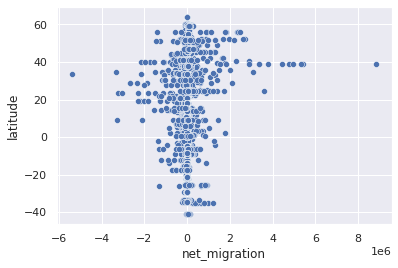

In [ ]:
#make a scatterplot visualizing the relationship between net_migration and latitude.
sns.scatterplot(x='net_migration', y='latitude', data=clean_mig_data) 

In [ ]:
#explore net migration among latitude zones as defined by AMS: tropical zone, northern subtropical zone, southern subtropical zone, arctic zone, antarctic zone
tropics_beta=(clean_mig_data['latitude']>=-23.5) & (clean_mig_data['latitude']<=23.5) 
tropics=clean_mig_data.iloc[tropics_beta.values,[0,1,4,5,15]]
subtrop_n=(clean_mig_data['latitude']>=23.6) & (clean_mig_data['latitude']<=60.0)
subtropics_north=clean_mig_data.iloc[subtrop_n.values,[0,1,4,5,15]]
subtrop_s=(clean_mig_data['latitude']<=-23.6) & (clean_mig_data['latitude']>=-60.0)
subtropics_south=clean_mig_data.iloc[subtrop_s.values,[0,1,4,5,15]]
antarctic_beta=(clean_mig_data['latitude']<=-60) 
antarctic=clean_mig_data.iloc[antarctic_beta.values,[0,1,4,5,15]]
arctic_beta=(clean_mig_data['latitude']>=60) 
arctic=clean_mig_data.iloc[arctic_beta.values,[0,1,4,5,15]]
pd.set_option("max_rows", None)




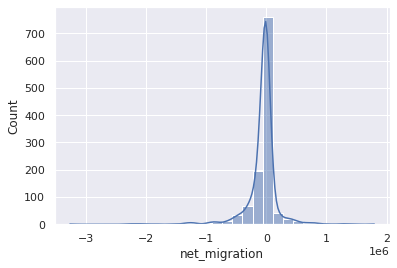

In [ ]:
sns.histplot(tropics['net_migration'], bins=30, kde=True) #plot the distribution of net migration within the tropical zone. 
#negative integers point to more emigration out of nations within this zone, than immigration into nations within this zone.

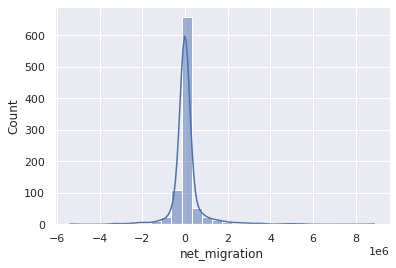

In [ ]:
sns.histplot(subtropics_north['net_migration'], bins=30, kde=True) #plot the distribution of net migration within the northern subtropical zone.
#observe, positive integers point to more immigration within this zone, comapared to immigration with the tropical zone, pictured above.

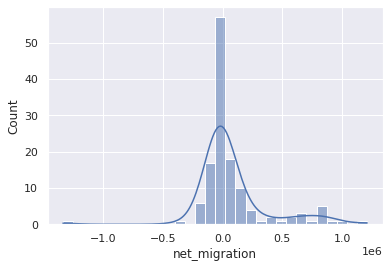

In [ ]:
sns.histplot(subtropics_south['net_migration'], bins=30, kde=True) #plot the distribution in the southern subtropical zone.
#observe overall less net migration in the souther subtropical zone as compared to the tropical and northern subtropical zones, pictured above.

The distribution of the above three histograms are not approximately normal.


In [ ]:
subtropics_north.describe() #use descritpive statistics 

,net_migration,migration_perc,latitude
count,9.270000e+02,927.000000,927.000000
mean,6.974432e+04,0.010324,41.084461
std,7.879399e+05,0.068595,9.514358
min,-5.386986e+06,-0.263566,23.610500
25%,-9.701150e+04,-0.008648,33.990500
50%,1.430000e+02,0.000055,40.416700
75%,9.606000e+04,0.014140,48.184250
max,8.859954e+06,0.787049,59.913800


In [ ]:
subtropics_south.describe()  #use descritpive statistics 

,net_migration,migration_perc,latitude
count,1.320000e+02,132.000000,132.000000
mean,7.630019e+04,-0.002988,-30.660000
std,2.999171e+05,0.024700,5.286937
min,-1.336060e+06,-0.104491,-41.286500
25%,-4.670750e+04,-0.017547,-34.894100
50%,-1.076300e+04,-0.002993,-29.520800
75%,9.480875e+04,0.011634,-25.746000
max,1.210802e+06,0.068327,-24.654400


In [ ]:
tropics.describe() #use descritpive statistics 

,net_migration,migration_perc,latitude
count,1.182000e+03,1182.000000,1182.000000
mean,-6.262403e+04,-0.010467,4.556195
std,2.894579e+05,0.044606,12.283948
min,-3.266243e+06,-0.241790,-22.564800
25%,-8.000675e+04,-0.023622,-4.276700
50%,-9.817500e+03,-0.006870,6.917710
75%,1.016750e+03,0.000725,13.730800
max,1.796103e+06,0.374022,23.133300


In [ ]:
pd.set_option("max_rows", None) 
 # set to max rows to view the entire dataset of our southern polar zone.
 #no world bank data on antarctic latitudinal zone
antarctic

In [ ]:
clean_mig_data.sort_values(by=['incomeLevel', 'net_migration']) 
#explore the relationship between net migration and income level

In [ ]:
# breakthe 4 income level into categories.
h_income=clean_mig_data['incomeLevel']=='High income'
high_income=clean_mig_data.iloc[h_income.values]
l_income=clean_mig_data['incomeLevel']=='Low income'
low_income=clean_mig_data.iloc[l_income.values]
low_income
lm_income=clean_mig_data['incomeLevel']=='Lower middle income'
lower_middle_income=clean_mig_data.iloc[lm_income.values]
lower_middle_income
um_income=clean_mig_data['incomeLevel']=='Upper middle income'
upper_middle_income=clean_mig_data.iloc[um_income.values]


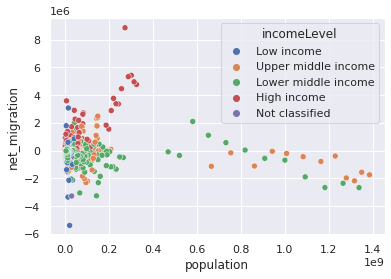

In [ ]:
#make a scatterplot visualizing the relationship that incomeLevel has with net migration. 
#Negative integers imply emigration out of, and positive integers imply immigration into, their respective native nation.
sns.scatterplot(x = "population", y = "net_migration", hue='incomeLevel', data = clean_mig_data)

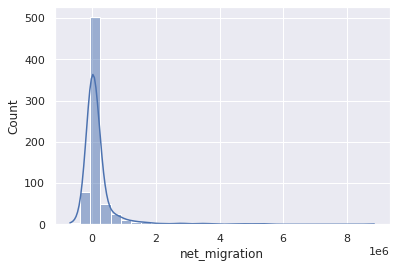

In [ ]:
#plot the distribution of net_migration within the classification of High income. observe insignificant frequency of emigration.  
sns.histplot(high_income['net_migration'], bins=30, kde=True) 

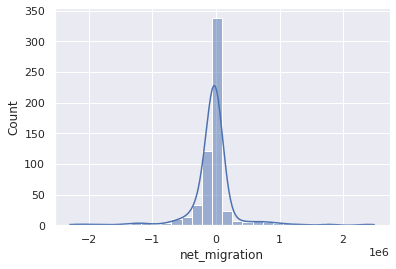

In [ ]:
#plot the distribution of net_migration within the classification of Upper middle class. The distribtuion is closer to approximately normal.
sns.histplot(upper_middle_income['net_migration'], bins=30, kde=True)

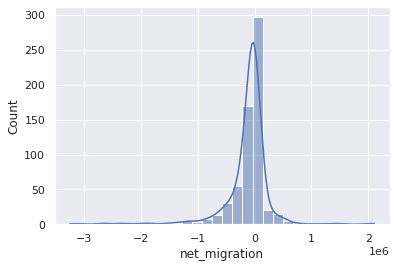

In [ ]:
#plot the distribution of net_migration within the classification of lower middle income. 
#observe skewing and a higher frequency of emigration than immigration.
sns.histplot(lower_middle_income['net_migration'], bins=30, kde=True)

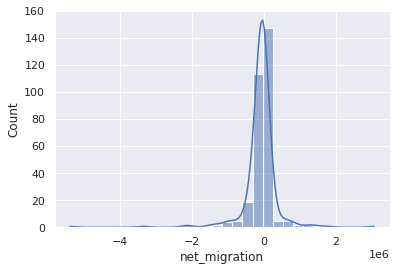

In [ ]:
#plot the distribution of net_migration within the classification of low income. 
#observe skewing and a higher frequency of emigration than immigration.
sns.histplot(low_income['net_migration'], bins=30, kde=True)

In [ ]:
high_income.describe() #use descritpive statistics 

In [ ]:
upper_middle_income.describe #use descritpive statistics 

In [ ]:
lower_middle_income.describe() #use descritpive statistics 

In [ ]:
low_income.describe() #use descritpive statistics 

**ANCILLARY EDA**


In [ ]:
clean_mig_data.sort_values(by=['population', 'net_migration'])  #explore the relationship between population density and net migration

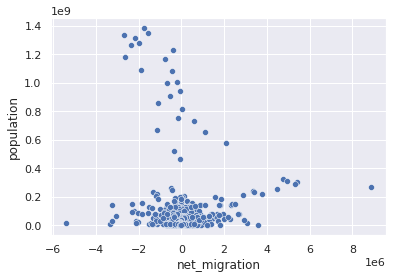

In [ ]:
sns.scatterplot(x='net_migration', y='population', data=clean_mig_data)

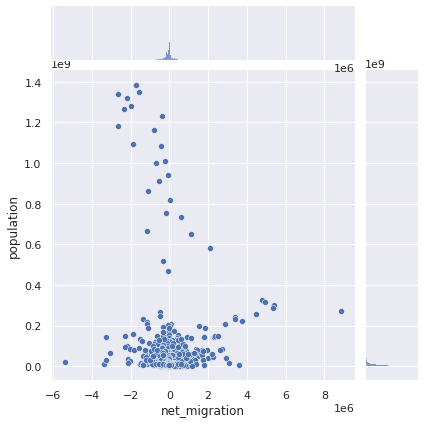

In [ ]:
#run a jointplot combining scatterplot with histogram. 
#appear abnormal. Ceasing to continue analysis with these two variables.
sns.jointplot(x = clean_mig_data["net_migration"], y = clean_mig_data["population"]) 

In [ ]:
clean_mig_data.sort_values(by='year', ascending=False) #explore the years

In [ ]:
#break down the dataset into centuries, 20th and 21st
twentieth_century_beta= (clean_mig_data['year']>= '1960-01-01') & (clean_mig_data['year']<='1999-01-01')
twenty_first_century_beta=(clean_mig_data['year']>= '2000-01-01') & (clean_mig_data['year']<='2018-01-01')
twentieth_century=clean_mig_data.iloc[twentieth_century_beta.values]
twenty_first_century=clean_mig_data.iloc[twenty_first_century_beta.values]

In [ ]:
twentieth_century.head() # take an abridged review of the data with a header


In [ ]:
twenty_first_century.head() # take an abridged review of the data with a header

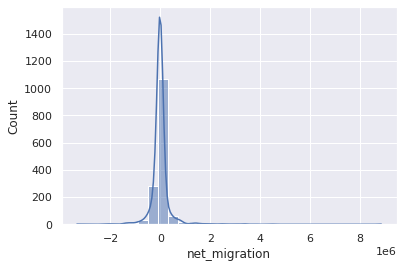

In [ ]:
#plot the distribution of net migration within the twentieth century.
sns.histplot(twentieth_century['net_migration'], bins=30, kde=True)

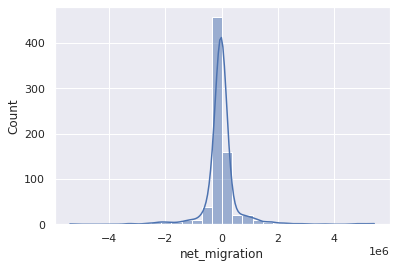

In [ ]:
#plot the distribution of net migration within the twenty first century.
sns.histplot(twenty_first_century['net_migration'], bins=30, kde=True)

# **ANALYZE THE DATASET**

**null hypothesis 1:**  From 1960 to 2018, there is no statistical significance in net migration among those who qualify as falling into the “High” income level/tier per World Bank classifications, compared to those those who qualify at lower income levels/tiers.





In [ ]:
#run a ttest.
stats.ttest_ind(high_income['net_migration'], low_income['net_migration']) #there is statistical significance 

Ttest_indResult(statistic=6.468909002118691, pvalue=1.5363433954191008e-10)

In [ ]:
#run a ttest
stats.ttest_ind(high_income['net_migration'], lower_middle_income['net_migration']) #there is statistical significance 

Ttest_indResult(statistic=10.1406387592726, pvalue=2.4766292829677352e-23)

In [ ]:
#run a ttest
stats.ttest_ind(high_income['net_migration'], upper_middle_income['net_migration']) #there is statistical significance 

Ttest_indResult(statistic=7.618123458591516, pvalue=4.9412638851495306e-14)

In [ ]:
#prepare for pearson r. make categories equal length.
pr_high_income=high_income[399:699]
pr_low_income=low_income[0:300]


In [ ]:
#run a pearson r. test for correlation
stats.pearsonr(pr_high_income['net_migration'],pr_low_income['net_migration']) #weak, non linear relationship.

(-0.2291042430186374, 6.200865353989255e-05)

**null hypothesis 2**: There is no statistical significance in net migration among nations that lie within tropical latitudinal zones when compared with nations that lie within both the northern as well as southern subtropical latitudinal zones, from 1960 to 2018, respectively. 


In [ ]:
stats.ttest_ind(tropics['net_migration'], subtropics_north['net_migration']) #run a ttest. There is statistical significance. 

Ttest_indResult(statistic=-5.3351012341274515, pvalue=1.0573350191989725e-07)

In [ ]:
stats.ttest_ind(tropics['net_migration'], subtropics_south['net_migration']) #run a ttest. There is statistical significance.  

Ttest_indResult(statistic=-5.210762132470359, pvalue=2.1821066314405615e-07)

In [ ]:
stats.ttest_ind(subtropics_south['net_migration'], subtropics_north['net_migration']) #run a ttest. There is no statistical significance.  

Ttest_indResult(statistic=0.09458938968656022, pvalue=0.9246589054167256)

In [ ]:
stats.ttest_ind(arctic['net_migration'], subtropics_south['net_migration']) #run a ttest. There is no statistical significance.  

Ttest_indResult(statistic=-1.1067739106905525, pvalue=0.2701175185934031)

In [ ]:
#run a pearson r. test for correlation
stats.pearsonr(clean_mig_data['net_migration'],clean_mig_data['latitude']) #there no strong correlation or linear relationship. 

(0.06939182960004266, 0.0009509237384371732)

In [ ]:
stats.ttest_ind(twentieth_century['net_migration'], twenty_first_century['net_migration']) #run a tttest. no statistical significance

Ttest_indResult(statistic=0.11348510495023996, pvalue=0.9096560376463928)

Null hypothesis #1. We can reject the null. From 1960 to 2018, there is statistical significance in net migration among those who qualify as falling into the “High” income level/tier per World Bank classifications, compared to those those who qualify at lower income levels/tiers. 

Null Hypthesis #2.  We can reject the null. There is statistical significance in net migration among nations that lie within tropical latitudinal zones when compared with nations that lie within both the northern as well as southern subtropical latitudinal zones, from 1960 to 2018, respectively. 